In [3]:
# Drug Failure Prediction using Synthetic Data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Set style and seed
sns.set_theme()
plt.style.use('ggplot')
np.random.seed(42)

# Step 1: Create synthetic dataset
n_samples = 300
data = pd.DataFrame({
    'mol_weight': np.random.normal(350, 50, n_samples),
    'logP': np.random.normal(3.5, 1.0, n_samples),
    'solubility': np.random.normal(50, 15, n_samples),
    'toxicity_score': np.random.normal(0.5, 0.2, n_samples),
    'bioavailability': np.random.normal(60, 20, n_samples),
    'hERG_inhibition': np.random.normal(0.3, 0.15, n_samples),
    'liver_enzyme_elevation': np.random.normal(1.2, 0.5, n_samples),
    'CYP450_inhibition': np.random.normal(0.4, 0.2, n_samples),
    'clearance_rate': np.random.normal(8, 2, n_samples),
    'plasma_protein_binding': np.random.normal(90, 5, n_samples)
})

# Step 2: Simulate failure probabilities and outcome
failure_prob = (
    0.4 * (data['toxicity_score'] > 0.6).astype(int) +
    0.3 * (data['solubility'] < 40).astype(int) +
    0.2 * (data['hERG_inhibition'] > 0.4).astype(int) +
    0.1 * np.random.rand(n_samples)
)
data['status'] = (failure_prob > 0.5).astype(int)  # 1 = Failed, 0 = Passed

# Step 3: Split data
X = data.drop('status', axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train models
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

# Step 5: Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, logreg_pred))

print("Decision Tree Report:")
print(classification_report(y_test, tree_pred))

# Step 6: Bar plot of average feature values by status
feature_means = data.groupby('status').mean().T
feature_means.plot(kind='bar', figsize=(12,6))
plt.title("Average Feature Values by Drug Outcome")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(["Passed", "Failed"])
plt.tight_layout()
plt.show()

# Step 7: Feature importance plot from Decision Tree
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(8,6))
importances.plot(kind='barh')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


     mol_weight      logP  solubility  toxicity_score  bioavailability  \
0    374.835708  4.426178   70.990332        0.655672        46.496435   
1    343.086785  5.409417   63.869505        0.389763        57.109627   
2    382.384427  2.101432   50.894456        0.336360        44.151602   
3    426.151493  4.062969   40.295948        0.499325        53.840769   
4    338.292331  2.849357   60.473350        0.465963        22.127707   
..          ...       ...         ...             ...              ...   
495  376.945502  3.218900   80.091393        0.714030        76.264104   
496  298.137692  5.297687   80.922554        0.494696        54.420741   
497  340.483066  4.140843   68.125493        0.323625        54.404797   
498  306.219087  2.928821   65.360938        0.467387        75.807438   
499  280.860013  4.072583   58.887904        0.351019        66.801026   

     hERG_inhibition  liver_enzyme_elevation  CYP450_inhibition  \
0           0.385592                0.246096

In [5]:
# Modeling

X = data.drop('status', axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, logreg_preds))

print("\nDecision Tree Report:")
print(classification_report(y_test, tree_preds))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.50      0.67        10

    accuracy                           0.95       100
   macro avg       0.97      0.75      0.82       100
weighted avg       0.95      0.95      0.94       100


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.90      0.95        10

    accuracy                           0.99       100
   macro avg       0.99      0.95      0.97       100
weighted avg       0.99      0.99      0.99       100



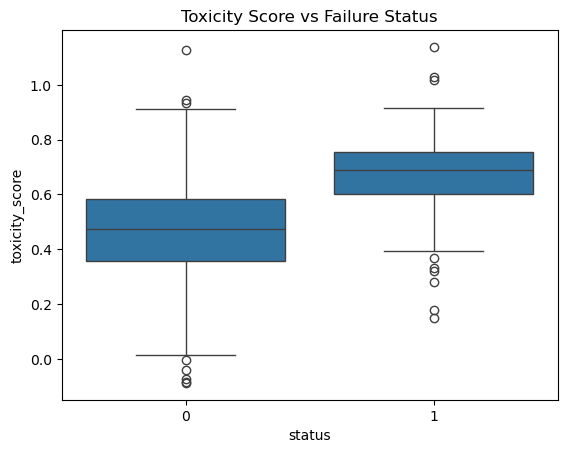

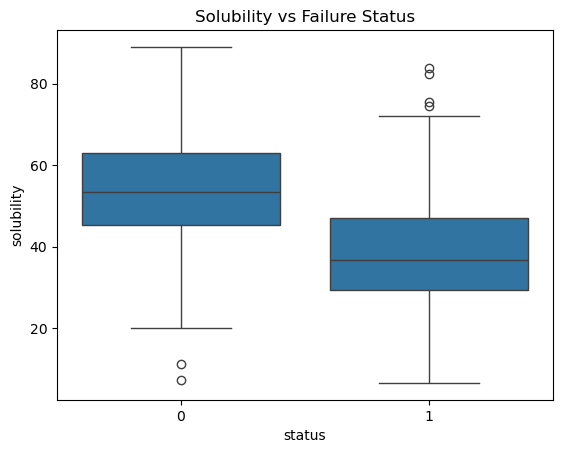

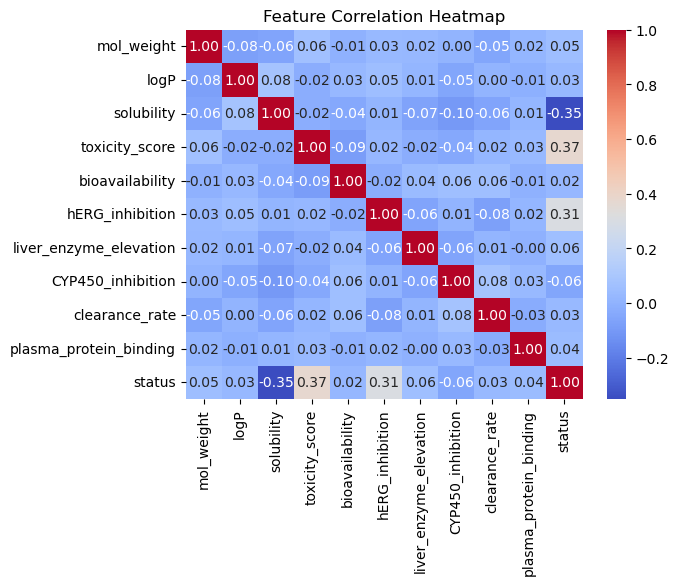

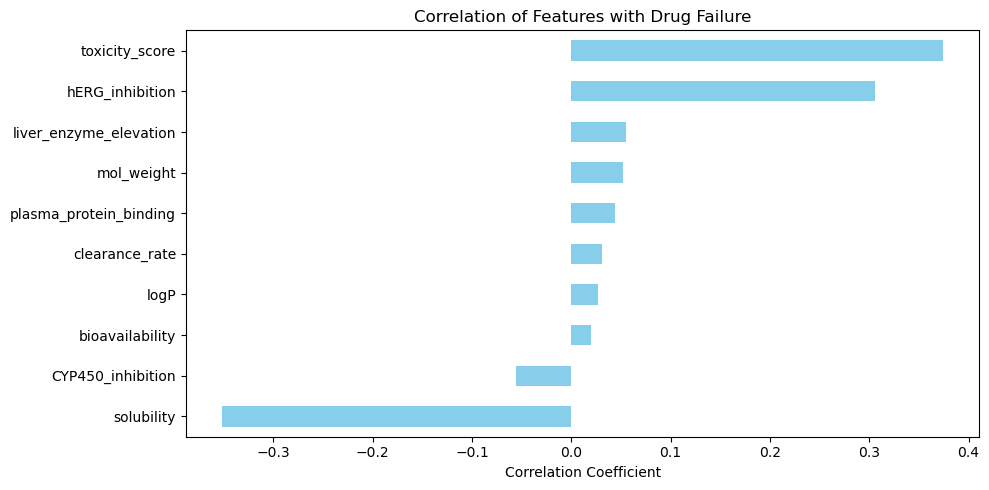

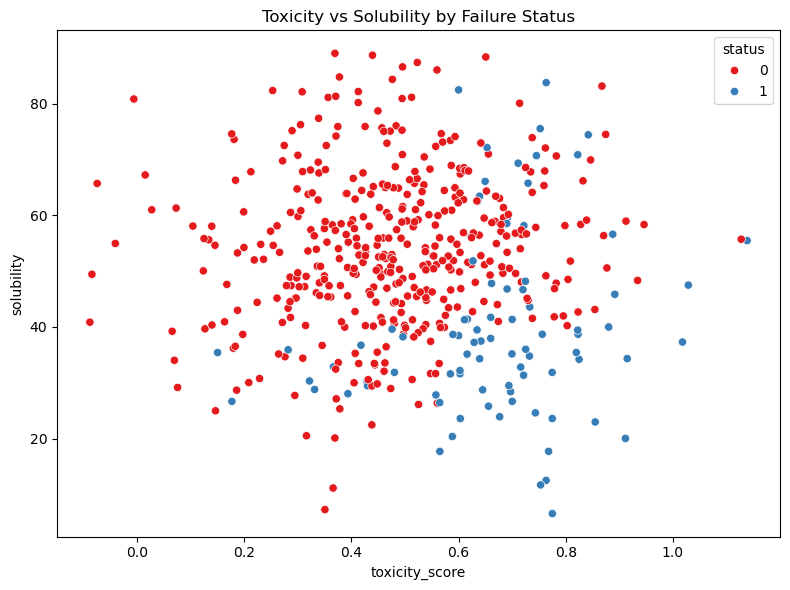

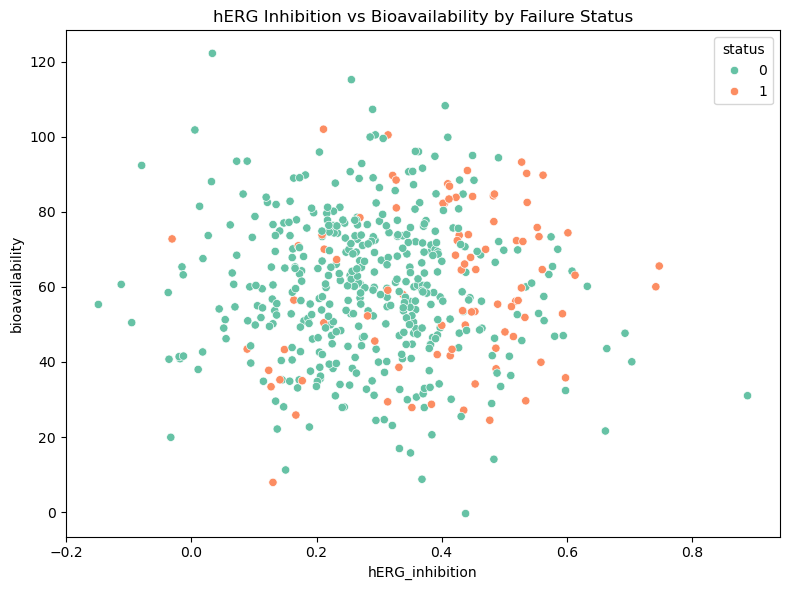

In [8]:
#  Visualizations

sns.boxplot(data=data, x='status', y='toxicity_score')
plt.title("Toxicity Score vs Failure Status")
plt.show()

sns.boxplot(data=data, x='status', y='solubility')
plt.title("Solubility vs Failure Status")
plt.show()

sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# Correlation bar plot
correlation = data.corr()['status'].drop('status')
plt.figure(figsize=(10, 5))
correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Drug Failure')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


# Scatter plot 1
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='toxicity_score', y='solubility', hue='status', palette='Set1')
plt.title('Toxicity vs Solubility by Failure Status')
plt.tight_layout()
plt.show()


# Scatter plot 2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='hERG_inhibition', y='bioavailability', hue='status', palette='Set2')
plt.title('hERG Inhibition vs Bioavailability by Failure Status')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        48
           1       1.00      0.25      0.40        12

    accuracy                           0.85        60
   macro avg       0.92      0.62      0.66        60
weighted avg       0.87      0.85      0.81        60

Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.92      1.00      0.96        12

    accuracy                           0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.98      0.98      0.98        60



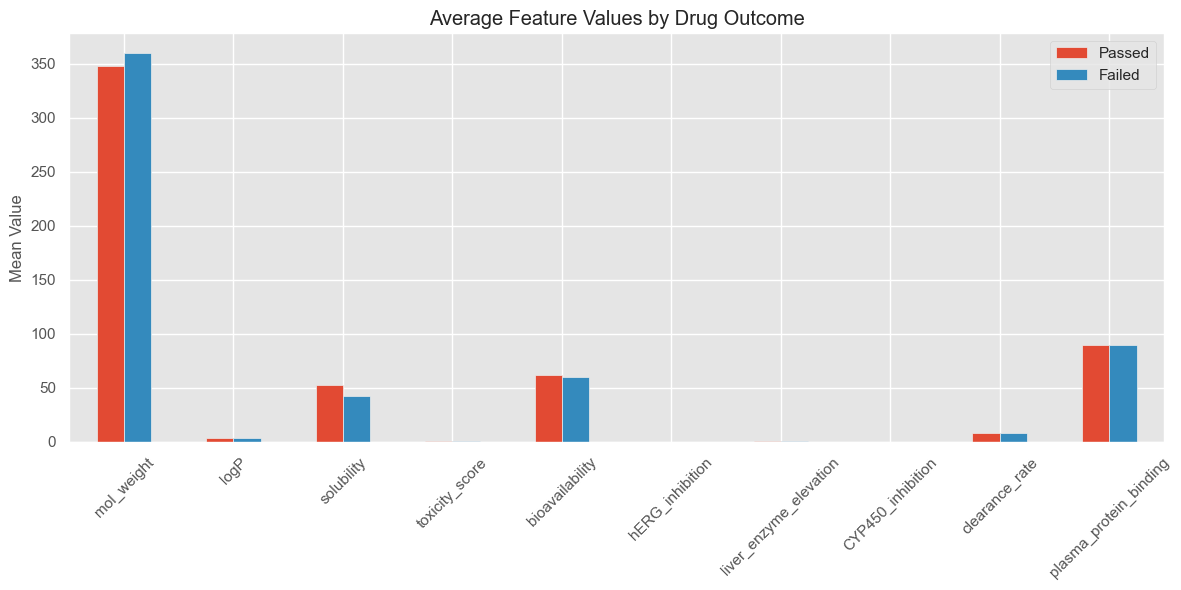

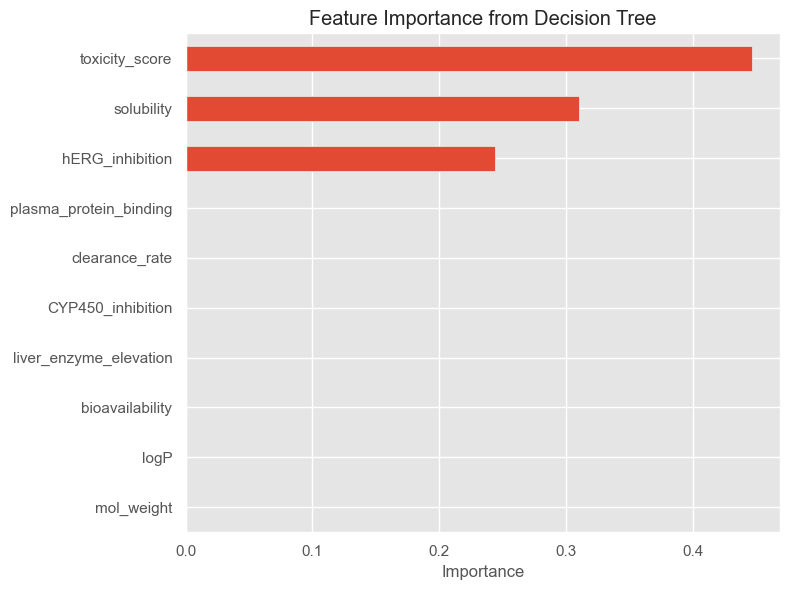

In [9]:
# Drug Failure Prediction using Synthetic Data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Set style and seed
sns.set_theme()
plt.style.use('ggplot')
np.random.seed(42)

# Step 1: Create synthetic dataset
n_samples = 300
data = pd.DataFrame({
    'mol_weight': np.random.normal(350, 50, n_samples),
    'logP': np.random.normal(3.5, 1.0, n_samples),
    'solubility': np.random.normal(50, 15, n_samples),
    'toxicity_score': np.random.normal(0.5, 0.2, n_samples),
    'bioavailability': np.random.normal(60, 20, n_samples),
    'hERG_inhibition': np.random.normal(0.3, 0.15, n_samples),
    'liver_enzyme_elevation': np.random.normal(1.2, 0.5, n_samples),
    'CYP450_inhibition': np.random.normal(0.4, 0.2, n_samples),
    'clearance_rate': np.random.normal(8, 2, n_samples),
    'plasma_protein_binding': np.random.normal(90, 5, n_samples)
})

# Step 2: Simulate failure probabilities and outcome
failure_prob = (
    0.4 * (data['toxicity_score'] > 0.6).astype(int) +
    0.3 * (data['solubility'] < 40).astype(int) +
    0.2 * (data['hERG_inhibition'] > 0.4).astype(int) +
    0.1 * np.random.rand(n_samples)
)
data['status'] = (failure_prob > 0.5).astype(int)  # 1 = Failed, 0 = Passed

# Step 3: Split data
X = data.drop('status', axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train models
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

# Step 5: Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, logreg_pred))

print("Decision Tree Report:")
print(classification_report(y_test, tree_pred))

# Step 6: Bar plot of average feature values by status
feature_means = data.groupby('status').mean().T
feature_means.plot(kind='bar', figsize=(12,6))
plt.title("Average Feature Values by Drug Outcome")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(["Passed", "Failed"])
plt.tight_layout()
plt.show()

# Step 7: Feature importance plot from Decision Tree
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(8,6))
importances.plot(kind='barh')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
